In [15]:
import cv2
from skimage.metrics import structural_similarity as ssim
import skimage
import matplotlib.pyplot as plt
import imutils
import numpy as np

In [99]:
imageA = cv2.imread("0.jpg")
imageB = cv2.imread("2.jpg")

#imageA = cv2.resize(imageA,(1000,1000),interpolation=cv2.INTER_LINEAR)
#imageB = cv2.resize(imageB,(1000,1000),interpolation=cv2.INTER_LINEAR)

In [132]:
def create_mask(image):
    image = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
    blurred = cv2.GaussianBlur( gray, (9,9), 0 )
    plt.axis("off")
    plt.imshow(blurred, cmap="gray")
    plt.show()
    _,thresh_img = cv2.threshold( gray, 215, 255, cv2.THRESH_BINARY)
    thresh_img = cv2.erode( thresh_img, None, iterations=2 )
    thresh_img  = cv2.dilate( thresh_img, None, iterations=4 )
    # perform a connected component analysis on the thresholded image,
    # then initialize a mask to store only the "large" components
    labels = skimage.measure.label( thresh_img, connectivity=2, background=0 )
    mask = np.zeros( thresh_img.shape, dtype="uint8" )
    # loop over the unique components
    for label in np.unique( labels ):
        # if this is the background label, ignore it
        if label == 0:
            continue
        # otherwise, construct the label mask and count the
        # number of pixels
        labelMask = np.zeros( thresh_img.shape, dtype="uint8" )
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero( labelMask )
        # if the number of pixels in the component is sufficiently
        # large, then add it to our mask of "large blobs"
        #if numPixels > 300:
        mask = cv2.add( mask, labelMask )
    return mask

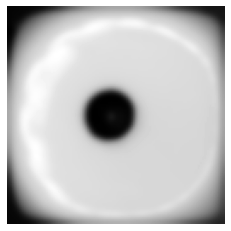

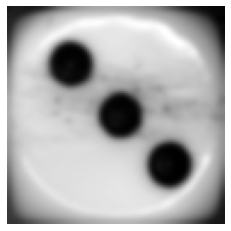

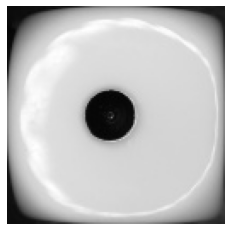

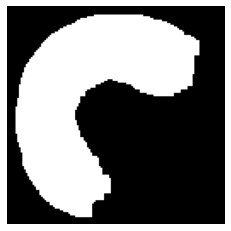

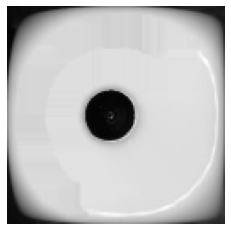

In [133]:
maskA = create_mask(imageA)
maskB = create_mask(imageB)

flatA = cv2.inpaint(imageA, maskA, 1, cv2.INPAINT_NS)
flatB = cv2.inpaint(imageB, maskB, 1, cv2.INPAINT_NS)

flatA = cv2.cvtColor(flatA, cv2.COLOR_BGR2GRAY)
flatB = cv2.cvtColor(flatB, cv2.COLOR_BGR2GRAY)

plt.axis("off")
plt.imshow(imageA, cmap="gray")
plt.show()

plt.axis("off")
plt.imshow(maskA, cmap="gray")
plt.show()

plt.axis("off")
plt.imshow(flatA, cmap="gray")
plt.show()

0.9347960576463306
Total number of defects in the image: 17





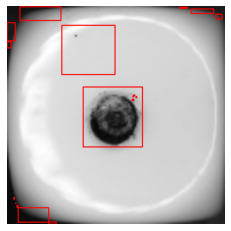

In [25]:
(score, diff) = ssim(flatA, flatB, full=True)
diff = (diff*255).astype("uint8")

print(score)

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#loop over the contours after threshold process
p = 0
for c in cnts:
    p=p+1
    (x, y, w, h) = cv2.boundingRect(c)
        #cv2.rectangle(imageA, (x, y), (x+w, y+h), (0, 0, 255), 1)
    cv2.rectangle(imageB, (x, y), (x+w, y+h), (255, 0, 0), 3)
print("Total number of defects in the image:",p)
print("\n\n")

kernel = np.ones((5, 5), np.uint8)

#Dilation Morphology --> used to expand the original image
dilation = cv2.dilate(thresh,kernel,iterations = 1)

#Erosion Morphology --> used to shrink down the original image
erosion = cv2.erode(thresh,kernel,iterations = 1)

#Gradient is used to get the difference between Erosion and Dilation
gradient = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)

#Opening --> Erosion followed by Dilation
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

#Closing --> Dilation followed by Erosion
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.axis("off")
plt.imshow(imageB)
plt.show()